In [35]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Задания для самостоятельного решения

#### 1. Вам даны результаты проверки двух препаратов.Требуется оценить, есть ли различие в эффекте у этих пациентов.

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [37]:
np.random.seed(11)
A=st.norm.rvs(scale=30,loc=11,size=100)
B=A+st.norm.rvs(scale=54,loc=11,size=100)

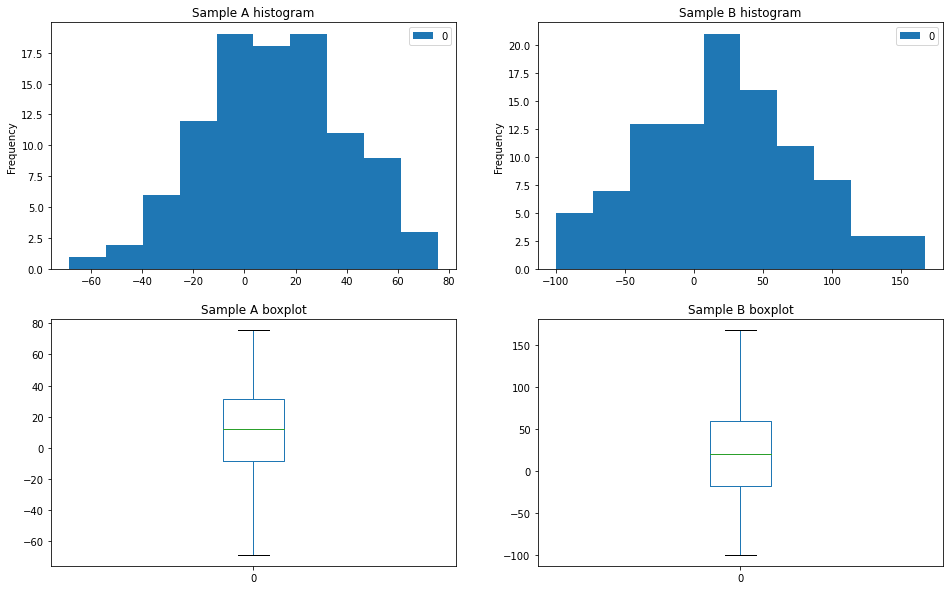

In [38]:
fig1, axs1 = plt.subplots(2,2, figsize=(16, 10))

sample_a_hist = pd.DataFrame(A).plot(kind='hist', ax=axs1[0,0])
sample_b_hist = pd.DataFrame(B).plot(kind='hist', ax=axs1[0,1])

sample_a_box = pd.DataFrame(A).plot(kind='box', ax=axs1[1,0])
sample_b_box = pd.DataFrame(B).plot(kind='box', ax=axs1[1,1])

axs1[0,0].set_title('Sample A histogram')
axs1[0,1].set_title('Sample B histogram')
axs1[1,0].set_title('Sample A boxplot')
axs1[1,1].set_title('Sample B boxplot')

plt.show()

# Визуальный анализ распределений говорит о том, что выборки скорее всего имеют одинаковое среднее,
# оба распределения похожи на нормальное, распределение значений выборки B имеет больший разброс,
# скорее всего статистически значимой разницы обнаружено не будет

In [39]:
T, p = st.ttest_ind(A, B)

print(T, p)

# При уровне доверия 95%, и p-value = 0,0845 у нас недостаточно оснований отклонить гипотезу H0
# У нас недостаточно оснований считать различия полученные в ходе исследования статистически значимыми

-1.733800647210997 0.08451003973499756


#### 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата.

B - выборка получающая препарат B

In [40]:
#Если A и B это одна и та же группа людей, но необходимо использовать t-test для связанных выборок

In [41]:
np.random.seed(11)
A=st.norm.rvs(scale=30,loc=11,size=100)
B=A+st.norm.rvs(scale=54,loc=11,size=100)

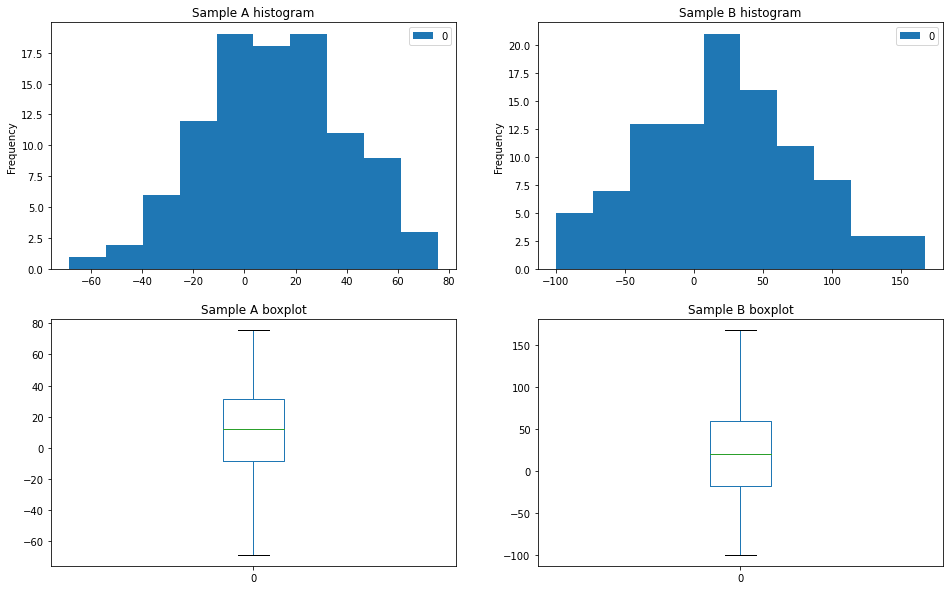

In [42]:
fig2, axs2 = plt.subplots(2,2, figsize=(16, 10))

sample_a_hist = pd.DataFrame(A).plot(kind='hist', ax=axs2[0,0])
sample_b_hist = pd.DataFrame(B).plot(kind='hist', ax=axs2[0,1])

sample_a_box = pd.DataFrame(A).plot(kind='box', ax=axs2[1,0])
sample_b_box = pd.DataFrame(B).plot(kind='box', ax=axs2[1,1])

axs2[0,0].set_title('Sample A histogram')
axs2[0,1].set_title('Sample B histogram')
axs2[1,0].set_title('Sample A boxplot')
axs2[1,1].set_title('Sample B boxplot')

plt.show()

In [43]:
T_rel, p_rel = st.ttest_rel(A, B)

print(T_rel, p_rel)

#  При уровне доверия 95%, и p-value = 0.0323 есть основания отклонить гипотезу H0 и говорить о
#  статистически значимых различиях между двумя выборками

-2.1701703735210716 0.03238579156467659


#### 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. Используя дисперсионный ананлиз, сделайте выводы о распредлениях результатов. Если ли эффект от удобрения по сравнению с минералкой?

In [44]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

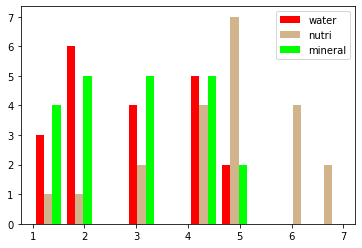

In [45]:
fig, ax = plt.subplots()
colors = ['red', 'tan', 'lime']
data = [water, nutri, mineral]

plt.hist(data, color=colors, label=['water', 'nutri', 'mineral'])
plt.legend()
plt.show()

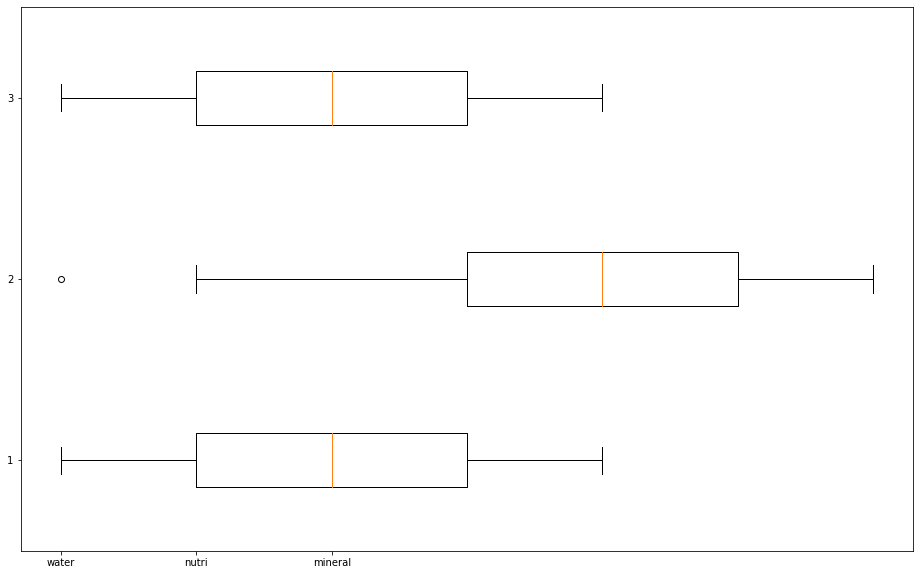

In [46]:
fig, ax = plt.subplots(figsize=(16, 10))
data = [water, nutri, mineral]

plt.boxplot(data, vert=False, whis=(2.5, 97.5))
plt.xticks([1, 2, 3], ['water', 'nutri', 'mineral'])
plt.show()

#Визуальный анализ показывает, что скорее всего группа nutri имеет статистичски значимые отличия
#т.к. среднее группы nutri находятся на границе ДИ двух других групп

In [47]:
F, p = st.f_oneway(water, nutri, mineral)

print(F, p)

# При уровне доверия в 95%, и p-value = 0,000292 есть достаточно оснований отклонить гипотезу H0
# и принять альтернативную гипотезу о том, что как минимум одна пара средних не равна

12.525963044834192 2.9240047906326866e-05


In [48]:
#Для того чтобы сравнить два распределения и определить наличие/отсутствие эффекта,
# можно использовать t-test (только сравнивая два распределния) или критерий Тьюки (сравнивая все)
# На мой взгляд более корректно использовать критерий Тьюки, т.к. изначально в нашем эксперименте
# участвует больше 2 групп

from statsmodels.stats.multicomp import pairwise_tukeyhsd

water = pd.DataFrame(water, columns=['size'])
water['group'] = 'water'

nutri = pd.DataFrame(nutri, columns=['size'])
nutri['group'] = 'nutri'

mineral = pd.DataFrame(mineral, columns=['size'])
mineral['group'] = 'mineral'

cucumbers = water.append(nutri).append(mineral)
cucumbers

,size,group
0,1,water
1,2,water
2,3,water
3,4,water
4,2,water
...,...,...
16,3,mineral
17,4,mineral
18,5,mineral
19,1,mineral


In [49]:
results = pairwise_tukeyhsd(endog=cucumbers['size'], groups=cucumbers['group'], alpha=0.05)
# tukey_data = pd.DataFrame(data=results._results_table.data[1:], columns = results._results_table.data[0])
# tukey_data
results._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
mineral,nutri,1.8571,0.001,0.842,2.8723,True
mineral,water,0.0405,0.9,-0.9873,1.0683,False
nutri,water,-1.8167,0.001,-2.8445,-0.7889,True


c:\users\ivnat\projects\netology\pyda-10\statistics_python_hw_6\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


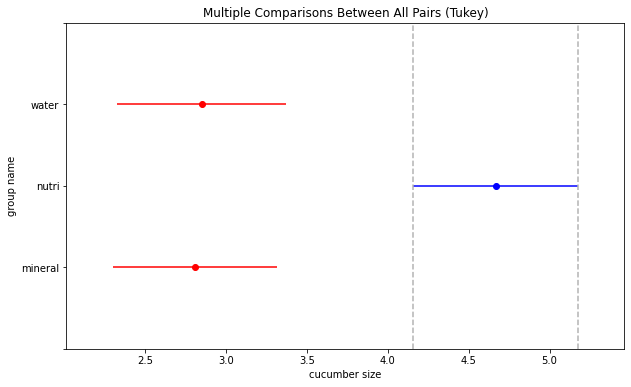

In [50]:
results.plot_simultaneous(comparison_name='nutri', ax=None, figsize=(10, 6), xlabel='cucumber size', ylabel='group name')
plt.show()


#Критерий Тьюки показывает статистически значимую разницу между группой nutri и двумя остальными группами
#При уровне доверия в 95%, p-value < 0.05 (p = 0.001), мы имеем достаточно оснований чтобы считать отличия,
# полученные для группы nutri статистически значимыми

# Cookie Cats

Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:

In [51]:
# Image("cookie_cats_video.jpeg")

По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.

Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [52]:
# Image("cc_gates.png")

# Данные A/B тестирования

In [53]:
data = pd.read_csv('cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:

userid - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?

retention_7 - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [54]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

# В каждой группе оказалось примерно равное количество человек (=записей)

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<AxesSubplot:>

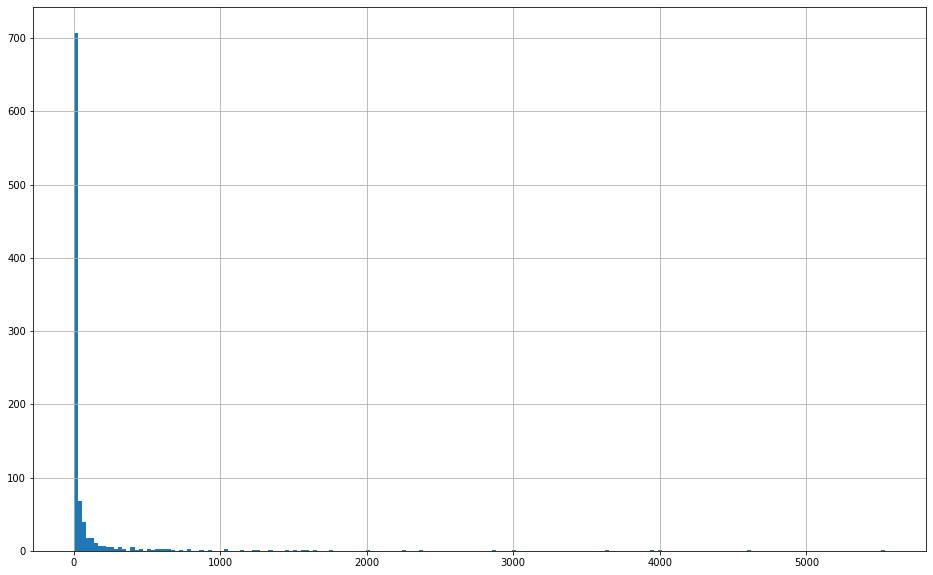

In [55]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(figsize=(16, 10), bins=200)  # попробуйте поварировать bins=150

In [56]:
#Ваши выводы
#Распределение не является нормальным, что соотносится с логикой работы казульных игр -
# большая часть игроков "отваливается" на начальных уровнях

Text(0.5, 0, '# Game rounds')

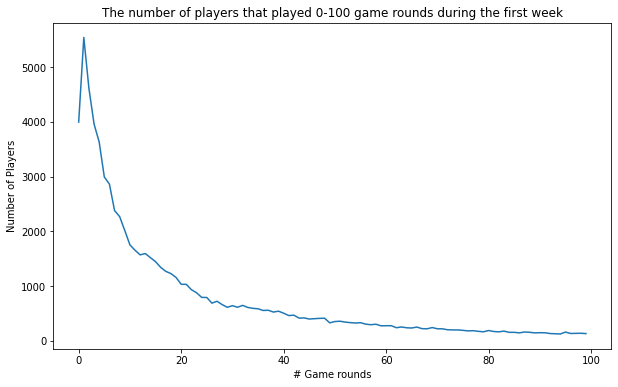

In [57]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [58]:
#Ваши выводы
#Большая часть игроков так и не добралась до первых ворот даже на 30 уровне

<AxesSubplot:ylabel='Density'>

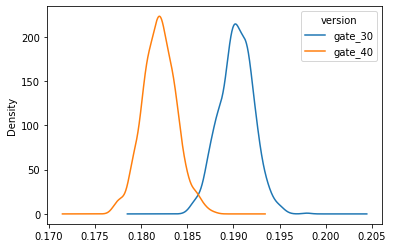

In [59]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_7
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

Ваши выводы?

С помощью кода выше мы используем ЦПТ, чтобы проверить две группы на равенство средних.
Мы берем сэмпл из общей выборки, делим его на группы и получаем среднее по ретеншену 7 дня для каждой группы.
Это действие повторяем 1000 раз. Согласно ЦПТ даже если распределение из которого берутся сэпмлы не распределено согласно нормальному закону, распределение построенное из средних большого количества выборок,
взятых из первого распределения будет нормальным. Что позволит использовать ДИ для сравнения двух таких групп.

Визуальное сравнение позволяет сделать вывод, что среди игроков из группы gate_30 было больше вернувшихся в игру на 7 день.

In [60]:
gate_30 = boot_1d['gate_30'].to_numpy()
gate_40 = boot_1d['gate_40'].to_numpy()

st.ttest_ind(gate_30, gate_40)

Ttest_indResult(statistic=101.4350314319558, pvalue=0.0)

Вне зависимости от принятого уровня доверия результаты теста говорят о том, что у нас есть основания отклонить H0.
Распределения значений двух групп имеют статистически значимые отличия.
Более того, визуальный анализ распределений доказывает, что ворота на уровне 30 дают более высокие показатели возврата на 7 день.

